# Matplotlib

## Basic Plotting with Matplotlib

In [1]:
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

First, let's input the pyplot scripting layer as PLT.
All of the functions which will run against
the Pyplot module are part of
the scripting layer of the architecture. 

Let's take a look at the plot function
by looking at the docstring. 

In [2]:
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

If you're not used to seeing it,
this Python function declaration with two arguments,
the star args, and
the double star kwargs can be a bit obscure. 

What's being said here by the star args is that
the function supports any number of unnamed arguments.
The double star keyword args also
means that it supports any number of named arguments.
This makes the function declaration very flexible since
you can pass in basically
any number of arguments, named or not,
but it makes it difficult to know what
is an appropriate argument. 

Reading on, we see that the arguments will be
interpreted as x, y pairs.


So let's try with just one data point at position 3,2. 

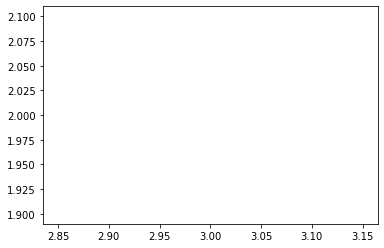

In [4]:
plt.plot(3,2)

Here, we see that the return value
is aligned to the object,
and we see our first figure up here.
We don't see the data points though, which is a bit odd.
It turns out that the third
argument should be a string which
signifies how we want that data point to be rendered. 


Let's use a period for a dot,
and we'll see that our data point shows up, there we go. 

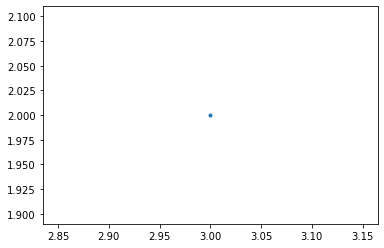

In [5]:
plt.plot(3,2,'.')

So let's take a look at
a comparable approach that's a bit more verbose,
and some people would call this
the matplotlib object API,
but I think it's more accurate to think of it as
directly interfacing with the Artist layer instead.
First, I'm going to import
a new backend called FigureCanvasAgg. 

I don't have to use the module-level use function
since we're not calling this from the scripting API.
Also import the figure object.
Then we'll go ahead and create
a new figure and associate it with the backend. 

We can then add a subplot directly to this. This number 111
actually means that we just want one plot.
The return value for the subplot is the axes object,
which contains methods for plotting,
so we can plot our image as per usual. 

Now, the backend that we're using,
the one for the Jupyter Notebooks,
isn't able to render this directly,
since it expects the scripting layer,
pyplot, to have created all of the objects. So here we'll save the figure to a png file instead.


In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3,2,'.')
canvas.print_png('test.png')

In [2]:
%%html
<img src='test.png'/>

That's a lot more work than using the scripting layer.
The scripting layer though isn't magic,
it's just doing some of the
behind the scenes work for us.
For instance, when we make a call
to pyplots plt.plot,
the scripting layer actually looks to
see if there's a figure that currently exists,
and if not, it creates a new one.
It then returns the axes for this figure. 

We can actually get access to the figure
using the GCF function,
which stands for get current figure of pyplot,
and get access to the axes as well using
the GCA function, get current axes. 

Let's create a new figure with pyplot. Then, let's make a plot,
grab the axes, and set the x and y limits.
We can do this using the axis function.
This function takes four parameters:
a minimum value for x which we'll put it zero,
a maximum value for x which we'll put at six. Then,
corresponding minimum and maximum values
for y which we'll put at zero and 10. 

(0.0, 6.0, 0.0, 10.0)

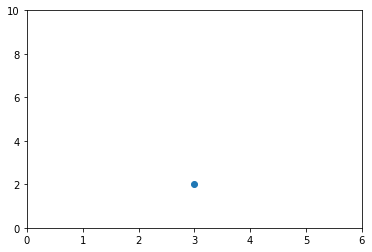

In [11]:
plt.figure()
plt.plot(3,2,'o')
ax = plt.gca()
ax.axis([0,6,0,10])

All right, one more demonstration
on the fundamentals of putting together a plot.
You can add Artists to an axes object at any time.
Pyplot is doing this for
us when we call the plot function.
It's determining what shape we want from the string,
the location associated with that shape,
that it's creating a patch object,
and adding that to the axes. 


If we make subsequent calls to the plot function,
this will add more data to our chart.
You can see that when this is done,
the points are rendered in different colors as
the axes recognizes them as different data series. 

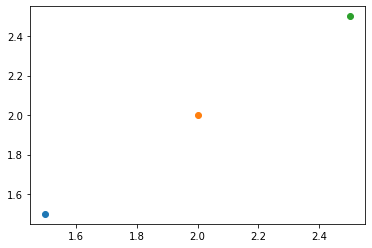

In [12]:
plt.figure()
plt.plot(1.5,1.5,'o')
plt.plot(2,2,'o')
plt.plot(2.5,2.5,'o')


But we can go further with
the axes object to the point where we can
actually get all of the child
objects that that axes contains.
We do this with the axes get_children function. 

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

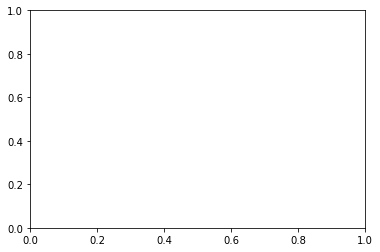

In [13]:
ax = plt.gca()
ax.get_children()

## Scatterplot

The scatter function takes an x-axis value as a first argument and
y-axis value as the second.
If the two arguments are the same, we get a nice diagonal alignment of points. 

Let's do this now.
I'll bring in numpy as we're going to use it later and
matplotlib is really based on numpy arrays.
I'll create a short array for x and make y the same. 

Then create a new figure and scatterplot. You can see in this plot
a nice diagonal line and matplotlib has sized
our axises accordingly.

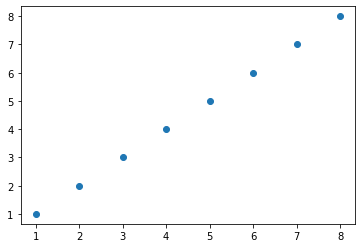

In [14]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x,y)

Now, scatter doesn't
represent items as a series. Instead, we can pass it a list of colors
which correspond to given points. Let's use some list arithmetic to create a
new list just short of the number of data points we need and
set all of the values to green.

Then we'll add a final value of red. Then we'll plot this, and we'll set the size of the data points to
100 to make it a little easier to see. 

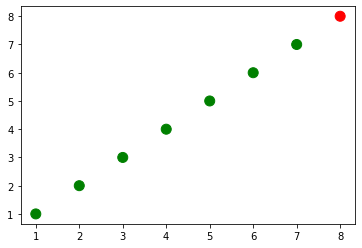

In [16]:
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()
plt.scatter(x,y, s=100, c=colors)

The separation of data points into lists, which describes them as components is
a pretty common pattern in matplotlib. You have some set of items, but they're actually described as the same
slice across many different data sources.

In object-based language,
you might expect that each data point is represented with its own instance,
which encapsulates all of its properties. For instance, it's called an x value and
a y value and a color and a size. That's not the case here. 

This is where it's useful to have some
knowledge of list comprehensions and lambdas as we talked about
in the first course. Also important is the zip function and
list unpacking. And because this is so
common in the Python data science world.

Recall that the zip method
takes a number of iterables and creates tuples out of them,
matching elements based on index. So if we have two lists of numbers,
zip will take the first from each and create a tuple, then the second from
each and create a tuple, and so on.

Also remember that zip has lazy evaluation
because it's actually a generator in Python 3 which means we
need to use the list function if we want to see the results
of iterating over zip. Let's demonstrate.

Here we'll create a new zip
generator with a zip function passing in two lists of numbers. When we convert this generator to a list,
we see there's a list of pairwise tuples.

In [17]:
zip_generator = zip([1,2,3,4,5],[6,7,8,9,10])

list(zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

Storing point data as tuples is common and you should be familiar with being able
to convert data to and from this form.

If we want to turn the data back into
two lists, one with the x component and one with the y component,
we can use parameter unpacking with zip. When you pass a list or an interval
more generally to a function and prepend it with an asterisk,
each item is taken out of the iterable and passed as a separate argument.

So we can do that here, passing into
a new zip function five parameters, each of length two. Zip will then create a new two value list
which is identical to our original x and y values. If we want to get even fancier, we can unpack this result into
two variables directly, x and y. 

In [18]:
zip_generator = zip([1,2,3,4,5],[6,7,8,9,10])
x,y = zip(*zip_generator)

print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


Let's take these two lists and
plot them to a new figure using scatter. Instead of plotting them as one data
series, we'll slice the lists and plot them as two data series.

You'll note that we can color each series
with a single value if we want to. We can also do things
like change the color or transparency of an entire series,
or individual data points as well.

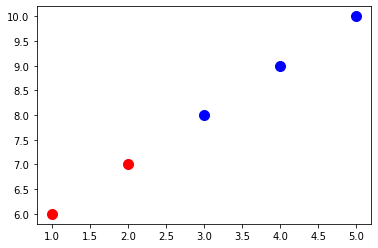

In [19]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')


The axis generally have labels to them
to explain what they represent or the units that they describe. Charts tend to have titles as well,
so let's put this in place now.

Since pyplot mirrors much of the axis API,
we can make calls directly on pyplot. Let's do this now, adding in an xlabel,
a ylabel, and then a title. And let's add a legend as well. You'll see that matplotlib places this
in the upper left hand corner and puts a little visual about
our data series there.

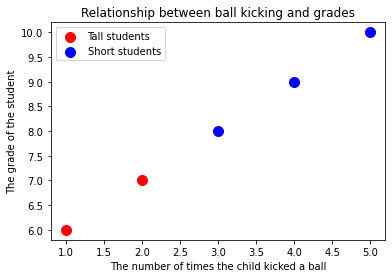

In [22]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')
plt.legend()

In the docs for the legend, you'll see
that there are a number of different parameters and one of them is called lock. And a value of 4, we'll put it in
the lower right hand corner of the axis.

We could also get rid of the frame and
add a title, and do any number of different
transformations. 

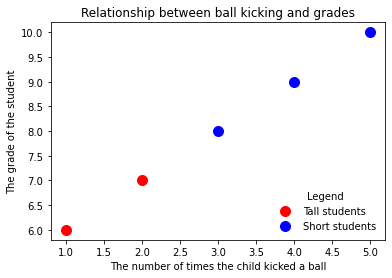

In [24]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')
plt.legend(loc=4, frameon=False, title='Legend')

 Text(0.5, 1.0, 'Relationship between ball kicking and grades'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

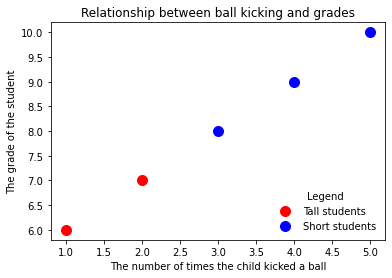

In [26]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

plt.xlabel('The number of times the child kicked a ball')
plt.ylabel('The grade of the student')
plt.title('Relationship between ball kicking and grades')
plt.legend(loc=4, frameon=False, title='Legend')

plt.gca().get_children()

##  Line plots

A line plot is created with the plot function.
And plots a number of different series of data points.
Connecting each series in a point with a line. 

We can use numpy to use a linear series of data points one through eight.
We'll also create a number of quadratically increasing values as
the second series.
Remember that you can use broadcasting in numpy to do this efficiently. 

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Here we can plot this, and this time I'll use the mini formatting language,
task map plot lib, to draw lines between data points.
We'll see the result as a two data series, the linear one at the bottom and
the quadratic one at the top.
Both are using dots because we use the -o flag. 

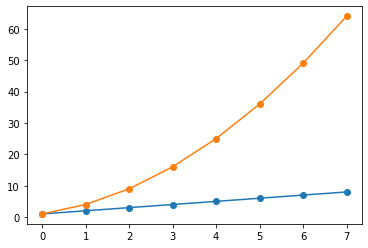

In [2]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

So there are a couple of things which are
new about this versus the scatter plots. First, we only gave y-axes values
to our plot call, no x axes values. Instead, the plot function was smart
enough to figure out that what we wanted was to use the index
of the series as the x value. Which is pretty handy when
you want to make quick plots.

Second we see that the plot identifies
this as two series of data and that the colors of the data from the series are
different including the data points and the lines between the data points. This is different from the scatter
plot which required us to label the lines directly.

Like all good Python libraries matplotlib
invents a string based mini language for commonly used formatting. For instance, we could use an s inside of
the formatting string which would plot another point using a square marker.

Or we could use a series of dashes and dots to identify that a line
should be dashed instead of solid. Here, let's plot another series. We can use the regular axes functions
creating labels for the axes and for the figure as a whole. And we can create a legend too.

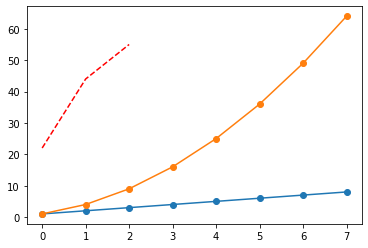

In [6]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o', [22,44,55], '--r')

But note that since we didn't label
the data points as we did with the scatter plot, we need to create legend
entries when we add the legend itself.

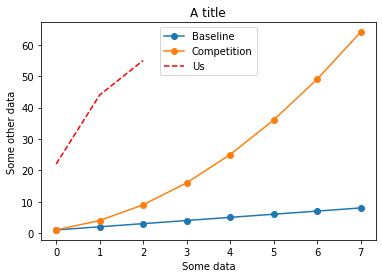

In [4]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o', [22,44,55], '--r')

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline','Competition','Us'])

This is a good time to introduce
the fill between function of matplotlib. Now this function isn't specific to line
plots, but you can see it commonly used with these plots, so
I'll introduce it in this context.

Let's imagine that we want to highlight
the difference between the green and the blue curves. We could tell the access to paint
a color between these series using the fill between function. First we get the current axes object, then we indicate the range of
x values we want to be filled.

We didn't specify any x values
in our call to plot, so we'll just use the same range of
data points it's already using.

Then we'll put in our lower bounds and our
upper bounds along with the color we want painted and for
fun I'll include a transparency value. And that's all there is to it.

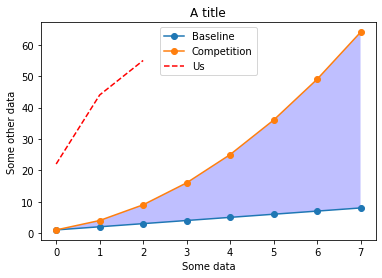

In [5]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o', [22,44,55], '--r')

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline','Competition','Us'])
plt.gca().fill_between(range(len(linear_data)),
                       linear_data,quadratic_data,
                       facecolor='blue',
                       alpha=0.25)

This is a great way to show, for instance,
the standard deviation of results or error bars.

More likely you'll have
a series of x values and y values which you're looking to plot. Often with line plots this comes in
the form of date time on the x axes.

Let's change our x axis to a series
of eight date time instances in one day intervals. Let's first create a new image. Then the NumPy arrange function which
you saw previously is really helpful at sampling some dates for us.

We can ask for an arrangement of dates at daily intervals
just by providing the start and end dates. We can now replot our linear and exponential data against
this set of dates.

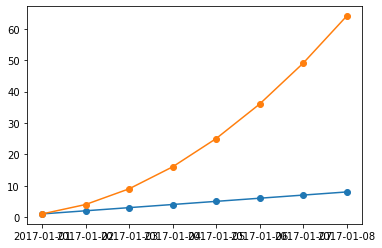

In [6]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', 
         observation_dates, quadratic_data,'-o')

That didn't seem to get us the effect
that we were interested in. This is unfortunately one of the great
pain points in data science in Python, date time handling. The standard library does it in
two different ways, while NumPy, which is used for scientific computing,
does it a third way.

In fact, there's probably a dozen
replacement libraries for date times in Python. The solution I'm going to use here comes
from a helper library in Pandas called to datetime.

Let's first import Pandas
then create a new figure. And let's arrange our set of dates
as per the previous code block.

In [7]:
import pandas as pd

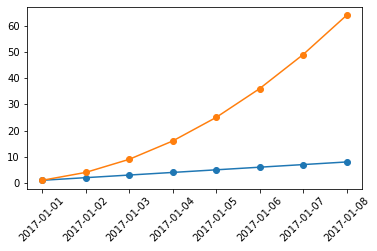

In [9]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', 
         observation_dates, quadratic_data,'-o')

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.25)

Matplotlib has a fairly strong connection
to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset
of LaTeX directly in your labels then matplotlib will render them as
equations

Here, for instance, we can set the title of the axes so
that there's an x squared directly in it. We do this by escaping to LaTeX
math mode with dollar signs. Note that this works regardless of
whether you have LaTeX installed. But with a full LaTeX installation, you have significant control
over text formatting.

Text(0.5, 1.0, 'Quadratic ($x^2$) vs Linear ($x$) performance')

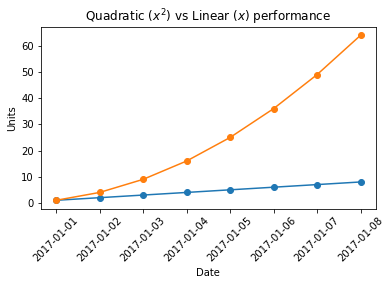

In [7]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', 
         observation_dates, quadratic_data,'-o')

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

plt.subplots_adjust(bottom=0.25)

ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic ($x^2$) vs Linear ($x$) performance')

## Bar Charts

Matplotlib has support for
several kinds of bar charts. The most general case, we plot a bar
chart by sending in a parameter of the x components, and
a parameter of the height of the bar. Let's do this with our linear data.

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Here I'm going to just create a list of
values as long as our linear data list. Then, we'll send this along with
the linear data's bar heights, to the bar function. We pass in the width of the bar as 0.3.

<BarContainer object of 8 artists>

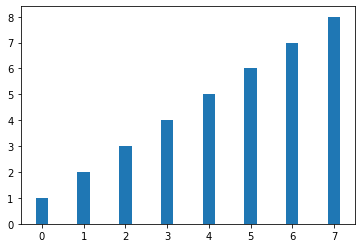

In [13]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

 To add a second bar, we simply call
the bar plot again with new data, keeping in mind that we need to
adjust the x component to make up for the first bar we plotted. Of course, we'll throw this bar in as red.

<BarContainer object of 8 artists>

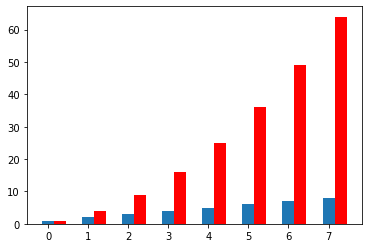

In [17]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

new_xvals = []

for item in xvals:
    new_xvals.append(item + 0.3)

plt.bar(new_xvals, quadratic_data, width = 0.3, color = 'red')

So the plot looks okay, but not great. All of the x labels are to the far
left of the items being described, and not centered. 

Now, we can center them with a given bar,
using the align parameter, but it's a bit frustrating when you
have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and
add a new data series manually. And this gets worse, we actually
have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set
the bar left location appropriately.

I'll be honest, bar charts are one of my least favorite
things to create in matplotlib. I feel like the foundation is there, but some of the ways I
would want to use the API, such as plotting several series of data
in groups across time, are sadly missing.

There are some other nice
features of bar charts, though. For instance, you can add error
bars to each bar as well, using the y-error parameter.

For example, each of our pieces of data in
the linear data might actually be a mean value, computed from many
different observations. So we could just create
a list of error values.

I'll import from a random function which
can generate some random integers, and then I'll use a list comprehension
to generate this new list. Then we could just call plt.bar again,
and see our new data appear.

In [18]:
from random import randint

<BarContainer object of 8 artists>

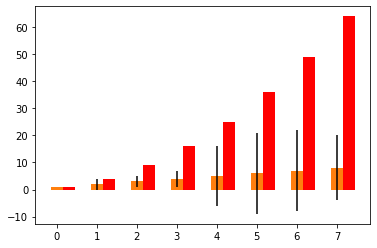

In [20]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

new_xvals = []

for item in xvals:
    new_xvals.append(item + 0.3)

plt.bar(new_xvals, quadratic_data, width = 0.3, color = 'red')

linear_err = [randint(0,15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr = linear_err)

We can also do stacked bar charts as well. For instance, if we wanted to show
cumulative values while also keeping the series independent, we could do
this by setting the bottom parameter in our second plot to be equal
to first set of data to plot.

<BarContainer object of 8 artists>

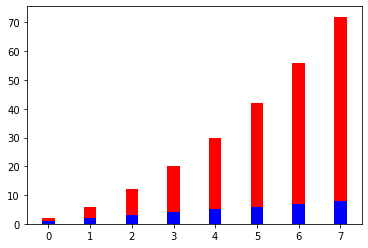

In [21]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color = 'b')
plt.bar(xvals, quadratic_data, width = 0.3, bottom = linear_data, color = 'r')

Finally, we can pivot this bar graph
into a horizontal bar graph by calling the barh function instead. But note that we have to change the bottom
to a left and the width to a height.

<BarContainer object of 8 artists>

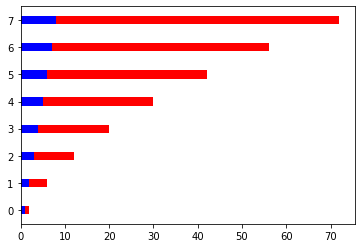

In [22]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color = 'b')
plt.barh(xvals, quadratic_data, height = 0.3, left = linear_data, color = 'r')

So those are the basics of charting and
plotting in Matplotlib. I think it's important to realize
that there really isn't any magic.

The scripting layer is really
a set of convenience functions on top of the object layer. Some people share a preference for
one or the other, but at the core, they manipulate the same data elements. And I don't think you should think of
them as being opposed to one another or duplicative. They work together, and being able to
move back and forth is really important.

## Dejunkifying a Plot

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
language_list = ['Python','SQL','Java','C++','JavaScript']
pos = np.arange(len(language_list))
popularity_value_list = [56,39,34,34,29]

<BarContainer object of 5 artists>

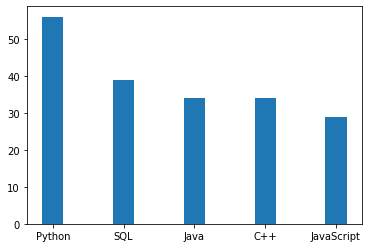

In [13]:
plt.figure()
plt.bar(language_list, popularity_value_list, width = 0.3)

Text(0.5, 1.0, 'Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

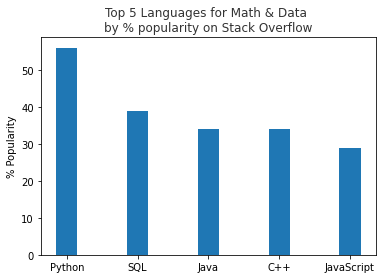

In [11]:
plt.figure()
plt.bar(pos, popularity_value_list, width = 0.3)
plt.xticks(pos, language_list)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

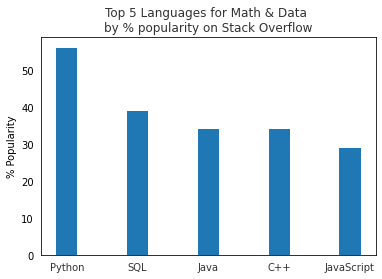

In [31]:
plt.figure()
plt.bar(language_list, popularity_value_list, width = 0.3)
plt.xticks(pos, language_list, alpha=0.8)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.tick_params(left = False, bottom = False)

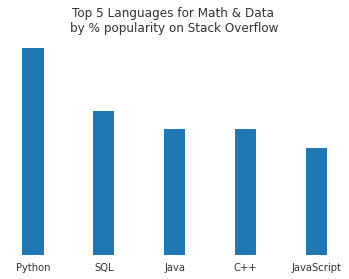

In [38]:
plt.figure()
plt.bar(language_list, popularity_value_list, width = 0.3)
plt.xticks(pos, language_list, alpha=0.8)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.tick_params(bottom = False, left = False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

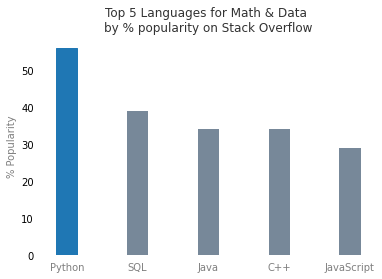

In [35]:
plt.figure()
bars = plt.bar(language_list, popularity_value_list, width = 0.3, color = 'lightslategrey')
bars[0].set_color('#1F77B4')
plt.xticks(pos, language_list, alpha=0.5)
plt.ylabel('% Popularity', alpha = 0.5)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

plt.tick_params(bottom = False, left = False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

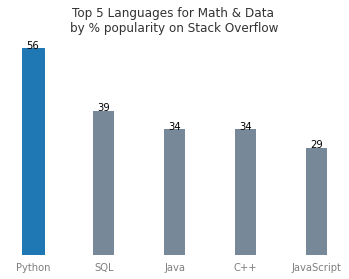

In [39]:
plt.figure()
bars = plt.bar(language_list, popularity_value_list, width = 0.3, color = 'lightslategrey')
bars[0].set_color('#1F77B4')
plt.xticks(pos, language_list, alpha=0.5)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

ax = plt.gca()
ax.axes.yaxis.set_visible(False)

plt.tick_params(bottom = False, left = False)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for i in range(len(pos)):
        plt.text(i, popularity_value_list[i], popularity_value_list[i], ha = 'center')